### Treinando Redes Neurais com Keras

Inicializadores em Keras: https://keras.io/initializers/

### Funções de Ativação

https://keras.io/activations/

# Multilayer Perceptron - Versão 1

Rede neural com apenas uma camada oculta

In [1]:
import keras
print (keras.__version__)

2.6.0


In [2]:
import tensorflow
print (tensorflow.__version__)

2.6.0


In [7]:
# Import dos Pacotes
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

# Garantindo que o resultado pode ser reproduzido
np.random.seed(100)

# Parâmetros da rede e do treinamento

NB_EPOCH = 200 #Número de épocas

BATCH_SIZE = 128 #Tamanho do Batch

VERBOSE = 1 #Verbose

NB_CLASSES = 10   #Número de outputs = número de dígitos

OPTIMIZER = tensorflow.keras.optimizers.SGD() #Otimizador SGD

N_HIDDEN = 128  #Número de neurônios ocultos

VALIDATION_SPLIT = 0.2 #fração de validação 

# Gerando datasets de treino e e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train possui 60000 linhas de valores 28x28 --> reshape para 60000 x 784
# Gera versão final dos datasetes de treino e de teste
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizando os dados
# Tipicamente, os valores associados a cada pixel são normalizados na faixa [0, 1] 
# (o que significa que a intensidade de cada pixel é dividida por 255, o valor de intensidade máxima). 
# A saída são 10 classes, uma para cada dígito.
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'exemplos de treino')
print(X_test.shape[0], 'exemplos de teste')

# Converte os vetores da class para matrizes binárias das classes
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# Cria as camadas
# A camada final usa a função de ativação softmax, uma generalização da função sigmóide. 
# Softmax transforma um vetor k-dimensional de valores reais arbitrários em um vetor k-dimensional de valores reais no 
# intervalo (0, 1).
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape = (RESHAPED,)))
model.add(Activation('softmax'))

# Sumário
model.summary()

# Compila o modelo
# Precisamos selecionar o otimizador que é o algoritmo específico usado para atualizar pesos enquanto 
# treinamos nosso modelo.
# Precisamos selecionar também a função objetivo que é usada pelo otimizador para navegar no espaço de pesos 
# (frequentemente, as funções objetivo são chamadas de função de perda (loss) e o processo de otimização é definido 
# como um processo de minimização de perdas).
# Outras funções aqui: https://keras.io/losses/
# A função objetivo "categorical_crossentropy" é a função objetivo adequada para predições de rótulos multiclass. 
# É também a escolha padrão em associação com a ativação softmax.
# A métrica é usada para medir a performance do modelo. Outras métricas: https://keras.io/metrics/
# As métricas são semelhantes às funções objetivo, com a única diferença de que elas não são usadas para 
# treinar um modelo, mas apenas para avaliar um modelo. 

model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

# Treina o modelo
# Epochs: Este é o número de vezes que o modelo é exposto ao conjunto de treinamento. Em cada iteração, 
# o otimizador tenta ajustar os pesos para que a função objetivo seja minimizada. 
# Batch_size: Esse é o número de instâncias de treinamento observadas antes que o otimizador execute uma 
# atualização de peso.
# Reservamos parte do conjunto de treinamento para validação. A idéia chave é que reservamos uma parte dos 
# dados de treinamento para medir o desempenho na validação durante o treinamento. 

modelo_v1 = model.fit(X_train, Y_train,
                      batch_size = BATCH_SIZE, 
                      epochs = NB_EPOCH,
                      verbose = VERBOSE, 
                      validation_split = VALIDATION_SPLIT)

# Avalia o modelo com os dados de teste
# Uma vez treinado o modelo, podemos avaliá-lo no conjunto de testes que contém novos exemplos não vistos. 
# Desta forma, podemos obter o valor mínimo alcançado pela função objetivo e o melhor valor alcançado pela métrica 
# de avaliação. Note-se que o conjunto de treinamento e o conjunto de teste são rigorosamente separados. 

score = model.evaluate(X_test, Y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

11501568/11490434 [==============================] - 0s 0us/step
60000 exemplos de treino
10000 exemplos de teste
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
375/375 [==============================] - 2s 2ms/step - loss: 1.4115 - accuracy: 0.6351 - val_loss: 0.9079 - val_accuracy: 0.8231
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.8033 - accuracy: 0.8240 - val_loss: 0.6632 - val_accuracy: 0.8557
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.6486 - accuracy: 0.8464 - val_loss: 0.5

Epoch 52/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.9108 - val_loss: 0.3058 - val_accuracy: 0.9158
Epoch 53/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.9111 - val_loss: 0.3050 - val_accuracy: 0.9158
Epoch 54/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.9115 - val_loss: 0.3044 - val_accuracy: 0.9164
Epoch 55/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.9115 - val_loss: 0.3038 - val_accuracy: 0.9162
Epoch 56/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3165 - accuracy: 0.9115 - val_loss: 0.3034 - val_accuracy: 0.9161
Epoch 57/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.9124 - val_loss: 0.3027 - val_accuracy: 0.9162
Epoch 58/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.9124 - val_loss: 0.3023 - val_accuracy:

Epoch 109/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2927 - accuracy: 0.9182 - val_loss: 0.2857 - val_accuracy: 0.9200
Epoch 110/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2924 - accuracy: 0.9184 - val_loss: 0.2856 - val_accuracy: 0.9203
Epoch 111/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.9183 - val_loss: 0.2853 - val_accuracy: 0.9202
Epoch 112/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2919 - accuracy: 0.9184 - val_loss: 0.2851 - val_accuracy: 0.9199
Epoch 113/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.9188 - val_loss: 0.2849 - val_accuracy: 0.9204
Epoch 114/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2914 - accuracy: 0.9185 - val_loss: 0.2848 - val_accuracy: 0.9207
Epoch 115/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2911 - accuracy: 0.9187 - val_loss: 0.2846 - val_ac

375/375 [==============================] - 1s 2ms/step - loss: 0.2810 - accuracy: 0.9215 - val_loss: 0.2780 - val_accuracy: 0.9228
Epoch 166/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.9214 - val_loss: 0.2779 - val_accuracy: 0.9227
Epoch 167/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.9216 - val_loss: 0.2778 - val_accuracy: 0.9226
Epoch 168/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.9216 - val_loss: 0.2778 - val_accuracy: 0.9225
Epoch 169/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.9216 - val_loss: 0.2776 - val_accuracy: 0.9227
Epoch 170/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2802 - accuracy: 0.9220 - val_loss: 0.2775 - val_accuracy: 0.9226
Epoch 171/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2801 - accuracy: 0.9218 - val_loss: 0.2775 - val_accuracy: 0.9226

# Multilayer Perceptron - Versão 2

Adiciona 2 camadas ocultas, usando função de ativação ReLu

In [8]:
# Import dos Pacotes
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

# Garantindo que o resultado pode ser reproduzido
np.random.seed(100)  

# Parâmetros da rede e do treinamento

NB_EPOCH = 200 #Número de épocas

BATCH_SIZE = 128 #Tamanho do Batch

VERBOSE = 1 #Verbose

NB_CLASSES = 10   #Número de outputs = número de dígitos

OPTIMIZER = tensorflow.keras.optimizers.SGD() #Otimizador SGD

N_HIDDEN = 128  #Número de neurônios ocultos

VALIDATION_SPLIT = 0.2 #fração de validação

# Gerando datasets de treino e e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train possui 60000 linhas de valores 28x28 --> reshape para 60000 x 784
# Gera versão final dos datasetes de treino e de teste
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizando os dados
# Tipicamente, os valores associados a cada pixel são normalizados na faixa [0, 1] 
# (o que significa que a intensidade de cada pixel é dividida por 255, o valor de intensidade máxima). 
# A saída é 10 classes, uma para cada dígito.
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'exemplos de treino')
print(X_test.shape[0], 'exemplos de teste')

# Converte os vetores da class para matrizes binárias das classes
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# Cria as camadas
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

# Sumário
model.summary()

# Compila o modelo
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

# Treina o modelo
modelo_v2 = model.fit(X_train, Y_train,
                      batch_size = BATCH_SIZE, 
                      epochs = NB_EPOCH,
                      verbose = VERBOSE, 
                      validation_split = VALIDATION_SPLIT)

# Avalia o modelo com os dados de teste
score = model.evaluate(X_test, Y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0

375/375 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9707 - val_loss: 0.1252 - val_accuracy: 0.9657
Epoch 50/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9717 - val_loss: 0.1237 - val_accuracy: 0.9669
Epoch 51/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.9715 - val_loss: 0.1225 - val_accuracy: 0.9666
Epoch 52/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9724 - val_loss: 0.1221 - val_accuracy: 0.9661
Epoch 53/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9729 - val_loss: 0.1204 - val_accuracy: 0.9668
Epoch 54/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0956 - accuracy: 0.9732 - val_loss: 0.1198 - val_accuracy: 0.9669
Epoch 55/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9739 - val_loss: 0.1186 - val_accuracy: 0.9674
Epoch

Epoch 106/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0459 - accuracy: 0.9882 - val_loss: 0.0924 - val_accuracy: 0.9722
Epoch 107/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.9886 - val_loss: 0.0925 - val_accuracy: 0.9718
Epoch 108/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0448 - accuracy: 0.9887 - val_loss: 0.0919 - val_accuracy: 0.9718
Epoch 109/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0442 - accuracy: 0.9890 - val_loss: 0.0918 - val_accuracy: 0.9713
Epoch 110/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9891 - val_loss: 0.0919 - val_accuracy: 0.9720
Epoch 111/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0432 - accuracy: 0.9896 - val_loss: 0.0908 - val_accuracy: 0.9720
Epoch 112/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0426 - accuracy: 0.9895 - val_loss: 0.0908 - val_ac

375/375 [==============================] - 1s 2ms/step - loss: 0.0239 - accuracy: 0.9957 - val_loss: 0.0882 - val_accuracy: 0.9731
Epoch 163/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0236 - accuracy: 0.9954 - val_loss: 0.0872 - val_accuracy: 0.9735
Epoch 164/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0233 - accuracy: 0.9956 - val_loss: 0.0873 - val_accuracy: 0.9739
Epoch 165/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 0.9958 - val_loss: 0.0871 - val_accuracy: 0.9735
Epoch 166/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0229 - accuracy: 0.9958 - val_loss: 0.0873 - val_accuracy: 0.9735
Epoch 167/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 0.9960 - val_loss: 0.0875 - val_accuracy: 0.9736
Epoch 168/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0224 - accuracy: 0.9960 - val_loss: 0.0870 - val_accuracy: 0.9738

# Multilayer Perceptron - Versão 3

Adicionando Dropout nas camadas ocultas e aumentando o número de epochs

60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense

Epoch 48/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1814 - accuracy: 0.9458 - val_loss: 0.1253 - val_accuracy: 0.9638
Epoch 49/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1787 - accuracy: 0.9465 - val_loss: 0.1244 - val_accuracy: 0.9643
Epoch 50/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1796 - accuracy: 0.9470 - val_loss: 0.1237 - val_accuracy: 0.9643
Epoch 51/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1767 - accuracy: 0.9485 - val_loss: 0.1219 - val_accuracy: 0.9648
Epoch 52/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1726 - accuracy: 0.9488 - val_loss: 0.1215 - val_accuracy: 0.9644
Epoch 53/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1719 - accuracy: 0.9503 - val_loss: 0.1201 - val_accuracy: 0.9647
Epoch 54/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1700 - accuracy: 0.9491 - val_loss: 0.1187 - val_accuracy:

375/375 [==============================] - 1s 3ms/step - loss: 0.1162 - accuracy: 0.9651 - val_loss: 0.0928 - val_accuracy: 0.9727
Epoch 105/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.9658 - val_loss: 0.0925 - val_accuracy: 0.9723
Epoch 106/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1158 - accuracy: 0.9650 - val_loss: 0.0925 - val_accuracy: 0.9728
Epoch 107/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9656 - val_loss: 0.0921 - val_accuracy: 0.9728
Epoch 108/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1139 - accuracy: 0.9655 - val_loss: 0.0916 - val_accuracy: 0.9729
Epoch 109/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9662 - val_loss: 0.0913 - val_accuracy: 0.9727
Epoch 110/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1130 - accuracy: 0.9668 - val_loss: 0.0914 - val_accuracy: 0.9733

375/375 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9732 - val_loss: 0.0825 - val_accuracy: 0.9758
Epoch 161/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0869 - accuracy: 0.9730 - val_loss: 0.0825 - val_accuracy: 0.9750
Epoch 162/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.9737 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoch 163/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.0826 - val_accuracy: 0.9755
Epoch 164/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9737 - val_loss: 0.0821 - val_accuracy: 0.9757
Epoch 165/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0865 - accuracy: 0.9733 - val_loss: 0.0820 - val_accuracy: 0.9753
Epoch 166/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.9739 - val_loss: 0.0820 - val_accuracy: 0.9753

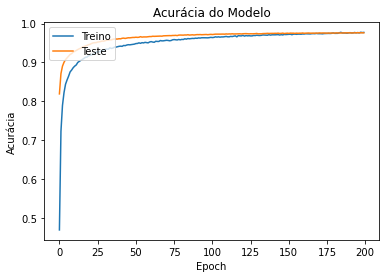

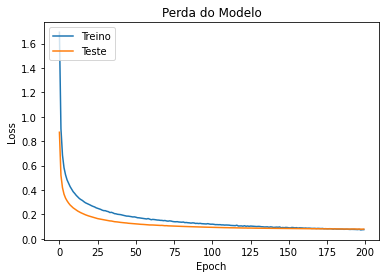

In [9]:
# Import dos pacotes
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

# Garantindo que o resultado pode ser reproduzido
np.random.seed(1671)  

# Parâmetros da rede e do treinamento
NB_EPOCH = 200

BATCH_SIZE = 128

VERBOSE = 1

NB_CLASSES = 10   # número de outputs = número de dígitos

OPTIMIZER = tensorflow.keras.optimizers.SGD() #Otimizador SGD

N_HIDDEN = 128

VALIDATION_SPLIT = 0.2 # quanto é reservado para validação

DROPOUT = 0.3

# Gerando datasets de treino e e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train possui 60000 linhas de valores 28x28 --> reshape para 60000 x 784
# Gera versão final dos datasetes de treino e de teste
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizando os dados
# Tipicamente, os valores associados a cada pixel são normalizados na faixa [0, 1] 
# (o que significa que a intensidade de cada pixel é dividida por 255, o valor de intensidade máxima). 
# A saída é 10 classes, uma para cada dígito.
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'exemplos de treino')
print(X_test.shape[0], 'exemplos de teste')

# Converte os vetores da class para matrizes binárias das classes
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# Cria as camadas
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

# Sumário
model.summary()

# Compila o modelo
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

# Treina o modelo
modelo_v3 = model.fit(X_train, Y_train,
                      batch_size = BATCH_SIZE, 
                      epochs = NB_EPOCH,
                      verbose = VERBOSE, 
                      validation_split = VALIDATION_SPLIT)

# Avalia o modelo com os dados de teste
score = model.evaluate(X_test, Y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# Imprime os dados
print(modelo_v3.history.keys())

# Sumariza o modelo para acurácia
plt.plot(modelo_v3.history['accuracy'])
plt.plot(modelo_v3.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc = 'upper left')
plt.show()

# Imprime a evolução de erro do modelo
plt.plot(modelo_v3.history['loss'])
plt.plot(modelo_v3.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc = 'upper left')
plt.show()

In [10]:
modelo_v3.history

{'loss': [1.6924406290054321,
  0.9015756845474243,
  0.6858315467834473,
  0.5822331309318542,
  0.5245140790939331,
  0.48242077231407166,
  0.4539816379547119,
  0.42727163434028625,
  0.4058328866958618,
  0.3857342004776001,
  0.37150129675865173,
  0.3556758761405945,
  0.3432624936103821,
  0.3303335905075073,
  0.3214556872844696,
  0.3141126334667206,
  0.30394038558006287,
  0.2950921952724457,
  0.28941860795021057,
  0.2831115424633026,
  0.2775408625602722,
  0.2708139717578888,
  0.2653414011001587,
  0.2609456479549408,
  0.25375035405158997,
  0.24940960109233856,
  0.24532915651798248,
  0.24071380496025085,
  0.2343137264251709,
  0.23054465651512146,
  0.23024731874465942,
  0.2254115343093872,
  0.22231538593769073,
  0.21503637731075287,
  0.21685785055160522,
  0.21218721568584442,
  0.20602908730506897,
  0.20459452271461487,
  0.20078741014003754,
  0.19962754845619202,
  0.1979237049818039,
  0.19523419439792633,
  0.19163624942302704,
  0.18871213495731354,
  

# Multilayer Perceptron - Versão 4

Testando outros otimizadores

https://keras.io/optimizers

In [7]:
# Import dos pacotes e funções
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Garantindo que o resultado pode ser reproduzido
np.random.seed(1671)  

In [11]:
# Parâmetros da rede e do treinamento
# NB_EPOCH = 20
# BATCH_SIZE = 128
# VERBOSE = 1
# NB_CLASSES = 10   # número de outputs = número de dígitos
# #OPTIMIZER = RMSprop() # otimizador
# OPTIMIZER = Adam() # otimizador
# N_HIDDEN = 128
# VALIDATION_SPLIT=0.2 # quanto é reservado para validação
# DROPOUT = 0.3


# Parâmetros da rede e do treinamento

NB_EPOCH = 200 #Número de épocas

BATCH_SIZE = 128 #Tamanho do Batch

VERBOSE = 1 #Verbose

NB_CLASSES = 10   #Número de outputs = número de dígitos

OPTIMIZER = tensorflow.keras.optimizers.Adam() #Otimizador Adam

#OPTIMIZER = tensorflow.keras.optimizers.RMSprop() #Otimizador RMSprop

N_HIDDEN = 128  #Número de neurônios ocultos

VALIDATION_SPLIT = 0.2 #fração de validação

DROPOUT = 0.3 #DropOut dos neurônios entre as camadas

In [12]:
# Gerando datasets de treino e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
# X_train possui 60000 linhas de valores 28x28 --> reshape para 60000 x 784
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
# Normalizando os dados
# Tipicamente, os valores associados a cada pixel são normalizados na faixa [0, 1] 
# (o que significa que a intensidade de cada pixel é dividida por 255, o valor de intensidade máxima). 
# A saída é 10 classes, uma para cada dígito.
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'exemplos de treinamento')
print(X_test.shape[0], 'exemplos de teste')

60000 exemplos de treinamento
10000 exemplos de teste


In [15]:
# Converte os vetores da class para matrizes binárias das classes
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [16]:
# Cria as camadas 
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [17]:
# Sumário da rede
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [18]:
# Compila o modelo
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

In [19]:
# Treinamento do modelo
modelo_v4 = model.fit(X_train, Y_train,
                      batch_size = BATCH_SIZE, 
                      epochs = NB_EPOCH,
                      verbose = VERBOSE, 
                      validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5216 - accuracy: 0.8412 - val_loss: 0.1808 - val_accuracy: 0.9484
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.9322 - val_loss: 0.1349 - val_accuracy: 0.9598
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1773 - accuracy: 0.9465 - val_loss: 0.1111 - val_accuracy: 0.9663
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1474 - accuracy: 0.9557 - val_loss: 0.1043 - val_accuracy: 0.9689
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1285 - accuracy: 0.9609 - val_loss: 0.0979 - val_accuracy: 0.9697
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1193 - accuracy: 0.9633 - val_loss: 0.0934 - val_accuracy: 0.9732
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.9679 - val_loss: 0.0902 - val_accuracy: 0.9740

Epoch 58/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9907 - val_loss: 0.0870 - val_accuracy: 0.9806
Epoch 59/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9898 - val_loss: 0.0914 - val_accuracy: 0.9812
Epoch 60/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 0.0940 - val_accuracy: 0.9808
Epoch 61/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0274 - accuracy: 0.9905 - val_loss: 0.0883 - val_accuracy: 0.9814
Epoch 62/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0897 - val_accuracy: 0.9803
Epoch 63/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0959 - val_accuracy: 0.9797
Epoch 64/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0948 - val_accuracy:

375/375 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.1001 - val_accuracy: 0.9818
Epoch 115/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.1068 - val_accuracy: 0.9821
Epoch 116/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0996 - val_accuracy: 0.9811
Epoch 117/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.1087 - val_accuracy: 0.9809
Epoch 118/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.1070 - val_accuracy: 0.9806
Epoch 119/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.1116 - val_accuracy: 0.9788
Epoch 120/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.1029 - val_accuracy: 0.9807

375/375 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.1282 - val_accuracy: 0.9788
Epoch 171/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.1333 - val_accuracy: 0.9791
Epoch 172/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.1217 - val_accuracy: 0.9791
Epoch 173/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.1295 - val_accuracy: 0.9790
Epoch 174/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.1244 - val_accuracy: 0.9792
Epoch 175/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.1236 - val_accuracy: 0.9795
Epoch 176/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.1272 - val_accuracy: 0.9802

In [20]:
# Testa o modelo e imprime o score
score = model.evaluate(X_test, Y_test, verbose = VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9800

Test score: 0.12257346510887146
Test accuracy: 0.9800000190734863


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


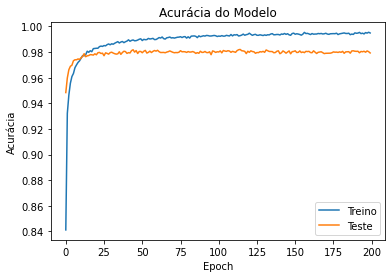

In [21]:
# Imprime os dados no modelo
print(modelo_v4.history.keys())

# Sumariza o modelo para acurácia
plt.plot(modelo_v4.history['accuracy'])
plt.plot(modelo_v4.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc = 'lower right')
plt.show()

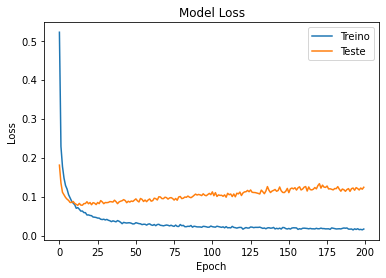

In [22]:
# Imprime a evolução de erro do modelo
plt.plot(modelo_v4.history['loss'])
plt.plot(modelo_v4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc='upper right')
plt.show()

## Fim